# Eigenvalue problems

"Eigenvalue" means characteristic value. These types of problems show up in many areas involving boundary-value problems, where we may not be able to obtain an analytical solution, but we can identify certain characteristic values that tell us important information about the system: the eigenvalues.

In [75]:
# import libraries for numerical functions and plotting
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

In [2]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300

## Example: beam buckling

Let's consider deflection in a simply supported (static) vertical beam: $y(x)$, with boundary conditions $y(0) = 0$ and $y(L) = 0$. To get the governing equation, start with considering the sum of moments around the upper pin:
\begin{align}
\sum M &= M_z + P y = 0 \\
M_z &= -P y
\end{align}

We also know that $M_z = E I y''$, so we can obtain
\begin{align}
M_z = E I \frac{d^2 y}{dx^2} &= -P y \\
y'' + \frac{P}{EI} y &= 0
\end{align}
This equation governs the stability of a beam, considering small deflections.
To simplify things, let's define $\lambda^2 = \frac{P}{EI}$, which gives us the ODE
\begin{equation}
y'' + \lambda^2 y = 0
\end{equation}
We can get the general solution to this:
\begin{equation}
y(x) = A \cos (\lambda x) + B \sin (\lambda x)
\end{equation}

To find the coefficients, let's apply the boundary conditions, starting with $x=0$:
\begin{align}
y(x=0) &= 0 = A \cos 0 + B \sin 0 \\
\rightarrow A &= 0 \\
y(x=L) &= 0 = B \sin (\lambda L)
\end{align}
Now what? $B \neq 0$, because otherwise we would have the trivial solution $y(x) = 0$. Instead, to satisfy the boundary condition, we need
\begin{align}
B \neq 0 \rightarrow \sin (\lambda L) &= 0 \\
\text{so} \quad \lambda L &= n \pi \quad n = 1, 2, 3, \ldots, \infty \\
\lambda &= \frac{n \pi}{L} \quad n = 1, 2, 3, \ldots, \infty
\end{align}
$\lambda$ give the the **eigenvalues** for this problem; as you can see, there are an infinite number, that correspond to **eigenfunctions**:
\begin{equation}
y_n = B \sin \left( \frac{n \pi x}{L} \right) \quad n = 1, 2, 3, \ldots, \infty
\end{equation}

The eigenvalues and associated eigenfunctions physically represent different modes of deflection.
For example, consider the first three modes (corresponding to $n = 1, 2, 3$):

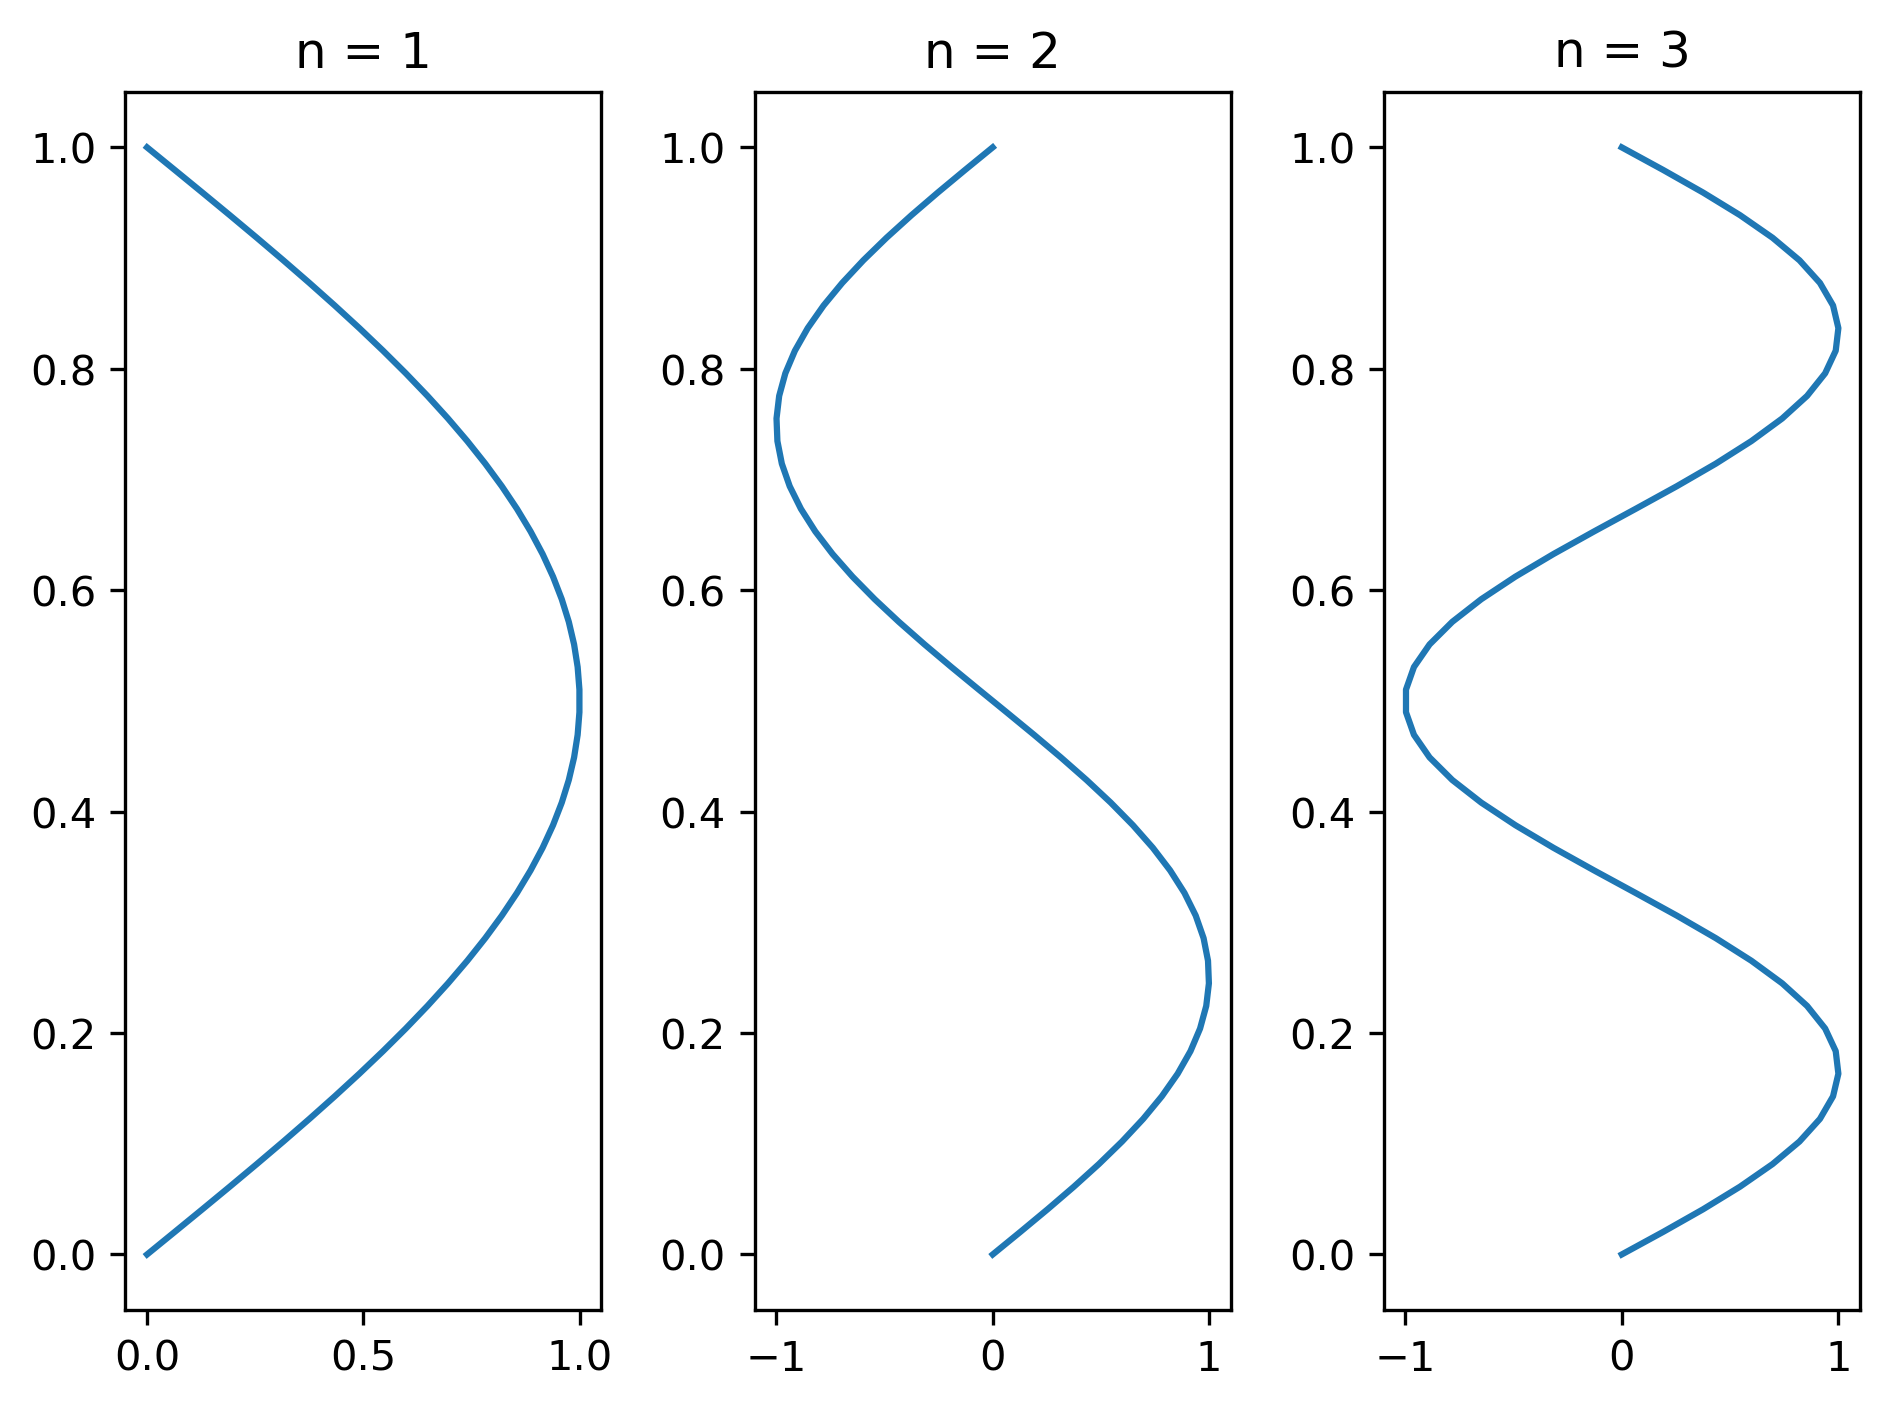

In [5]:
L = 1.0

fig, axes = plt.subplots(1, 3)

x = np.linspace(0, L)
y = np.sin(np.pi * x / L)
axes[0].plot(y, x)
axes[0].set_title('n = 1')

y = np.sin(2 * np.pi * x / L)
axes[1].plot(y, x)
axes[1].set_title('n = 2')

y = np.sin(3 * np.pi * x / L)
axes[2].plot(y, x)
axes[2].set_title('n = 3')

plt.tight_layout()
plt.show()

Here we see different modes of how the beam will buckle. How do we know when this happens?

Recall that the eigenvalue is connected to the physical properties of the beam:
\begin{gather}
\lambda^2 = \frac{P}{EI} \rightarrow \lambda = \sqrt{\frac{P}{EI}} = \frac{n \pi}{L} \\
P = \frac{EI}{L} n^2 \pi^2
\end{gather}
This means that when the combination of load force and beam properties match certain values, the beam will deflect—and buckle—in one of the modes corresponding to the associated eigenfunction.

In particular, the first mode ($n=1$) is interesting, because this is the first one that will be encountered if a load starts at zero and increases. This is the **Euler critical load** of buckling, $P_{cr}$:
\begin{gather}
\lambda_1 = \frac{\pi}{L} \rightarrow \lambda_1^2 = \frac{P}{EI} = \frac{\pi^2}{L^2} \\
P_{cr} = \frac{\pi^2 E I}{L^2}
\end{gather}

## Example: beam buckling with different boundary conditions

Let's consider a slightly different case, where at $x=0$ the beam is supported such that $y'(0) = 0$. How does the beam buckle in this case?

The governing equation and general solution are the same:
\begin{align}
y'' + \lambda^2 y &= 0 \\
y(x) &= A \cos (\lambda x) + B \sin (\lambda x)
\end{align}
but our boundary conditions are now different:
\begin{align}
y'(0) = 0 = -\lambda A \sin(0) + \lambda B\cos(0) \\
\rightarrow B &= 0 \\
y &= A \cos (\lambda x) \\
y(L) &= 0 = A \cos (\lambda L) \\
A \neq 0 \rightarrow \cos(\lambda L) &= 0 \\
\text{so} \quad \lambda L &= \frac{(2n-1) \pi}{2} \quad n = 1,2,3,\ldots, \infty \\
\lambda &= \frac{(2n-1) \pi}{2 L} \quad n = 1,2,3,\ldots, \infty
\end{align}

Then, the critical buckling load, again corresponding to $n=1$, is
\begin{equation}
P_{cr} = \frac{\pi^2 EI}{4 L^2}
\end{equation}

## Getting eigenvalues numerically

We can only get the eigenvalues analytically if we can obtain an analytical solution of the ODE, but we might want to get eigenvalues for more complex problems too. In that case, we can use an approach based on *finite differences* to find the eigenvalues.

Consider the same problem as above, for deflection of a simply supported beam:
\begin{equation}
y'' + \lambda^2 y = 0 
\end{equation}
with boundary conditions $y(0) = 0$ and $y(L) = 0$. Let's represent this using finite differences, for a case where $L=3$ and $\Delta x = 1$, so we have four points in our solution grid.

The finite difference representation of the ODE is:
\begin{align}
\frac{y_{i-1} - 2y_i + y_{i+1}}{\Delta x^2} + \lambda^2 y_i &= 0 \\
y_{i-1} + \left( \lambda^2 \Delta x^2 - 2 \right) y_i + y_{i+1} &= 0
\end{align}
However, in this case, we are not solving for the values of deflection ($y_i$), but instead the **eigenvalues** $\lambda$.

Then, we can write the system of equations using the above recursion formula and our two boundary conditions:
\begin{align}
y_1 &= 0 \\
y_1 + y_2 \left( \lambda^2 \Delta x^2 - 2 \right) + y_3 &= 0 \\
y_2 + y_3 \left( \lambda^2 \Delta x^2 - 2 \right) + y_4 &= 0 \\
y_4 &= 0
\end{align}
which we can simplify down to two equations by incorporating the boundary conditions into the equations for the two middle points, and also letting $k = \lambda^2 \Delta x^2$:
\begin{align}
y_2 (k-2) + y_3 &= 0 \\
y_2 + y_3 (k-2) &= 0
\end{align}
Let's modify this once more by multiplying both equations by $-1$:
\begin{align}
y_2 (2-k) - y_3 &= 0 \\
-y_2 + y_3 (2-k) &= 0
\end{align}

Now we can represent this system of equations as a matrix equation $A \mathbf{y} = \mathbf{b} = \mathbf{0}$:
\begin{equation}
\begin{bmatrix} 2-k & -1 \\ -1 & 2-k \end{bmatrix}
\begin{bmatrix} y_2 \\ y_3 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{equation}
$\mathbf{y} = \mathbf{0}$ is a trivial solution to this, so instead $\det(A) = 0$ satisfies this equation.
For our $2\times 2$ matrix, that looks like:
\begin{align}
\det(A) = \begin{vmatrix} 2-k & -1 \\ -1 & 2-k \end{vmatrix} = (2-k)^2 - 1 &= 0 \\
k^2 - 4k + 3 &= 0 \\
(k-3)(k-1) &= 0
\end{align}
so the roots of this equation are $k_1 = 1$ and $k_2 = 3$. Recall that $k$ is directly related to the eigenvalue: $k = \lambda^2 \Delta x^2$, and $\Delta x = 1$ for this case, so we can calculate the two associated eigenvalues:
\begin{align}
k_1 &= \lambda_1^2 \Delta x^2 = 1 \rightarrow \lambda_1 = 1 \\
k_2 &= \lambda_2^2 \Delta x^2 = 3 \rightarrow \lambda_2 = \sqrt{3} = 1.732
\end{align}

Our work has given us approximations for the first two eigenvalues. We can compare these against the exact values, given in general by $\lambda = n \pi / L$ (which we determined above):
\begin{align}
n=1: \quad \lambda_1 &= \frac{\pi}{L} = \frac{\pi}{3} = 1.0472 \\
n=2: \quad \lambda_2 &= \frac{2\pi}{L} = \frac{2\pi}{3} = 2.0944
\end{align}
So, our approximations are close, but with some obvious error. This is because we used a fairly crude step size of $\Delta x = 1$, dividing the domain into just three segments. By using a finer resolution, we can get more-accurate eigenvalues and also more of them (remember, there are actually an infinite number!). 

To do that, we will need to use Python, which offers the `np.linalg.eigvals()` function for calculating eigenvalues---essentially it is finding the roots to the polynomial given by $\det(A) = 0$. We need to modify this slightly, though, to use the function:
\begin{align}
\det(A) &= 0 \\
\det \left( A^* - k I \right) = 0
\end{align}
where the new matrix is
\begin{equation}
A^* = \begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}
\end{equation}
Then, `np.linalg.eigvals(A*)` will provide the values of $k$, which we can use to find the $\lambda$s:

In [24]:
dx = 1.0
L = 3.0

Astar = np.array([[2, -1], [-1, 2]])
k = np.linalg.eigvals(Astar)

lambdas = np.sqrt(k) / dx

print(f'λ_1: {lambdas[0]: 5.3f}')
print(f'λ_2: {lambdas[1]: 5.3f}')

λ_1:  1.732
λ_2:  1.000


As expected, this matches with our manual calculation above. But, we might want to calculate these eigenvalues more accurately, so let's generalize this a bit and then try using $\Delta x= 0.1$:

In [30]:
dx = 0.1
L = 3.0
x = np.arange(0, L+0.001, dx)

Astar = np.zeros((len(x)-2, len(x)-2))
Astar[0,0] = 2
Astar[0,1] = -1
Astar[-1,-2] = -1
Astar[-1,-1] = 2
for idx in range(len(Astar) - 1):
    if idx > 0 and idx < len(Astar) - 1:
        Astar[idx,idx-1] = -1
        Astar[idx,idx] = 2
        Astar[idx,idx+1] = -1

# sort in ascending order
k = np.sort(np.linalg.eigvals(Astar))

lambdas = np.sqrt(k) / dx

print(f'λ_1: {lambdas[0]: 5.3f}')
print(f'λ_2: {lambdas[1]: 5.3f}')

err = 100*np.abs(lambdas[0] - (np.pi/L)) / (np.pi/L)
print(f'Error in λ_1: {err: .2f}%')

λ_1:  1.047
λ_2:  2.091
Error in λ_1:  0.05%


## Example: mass-spring system

Let's analyze the motion of masses connected by springs in a system:

:::{figure-md} fig-mass-spring
<img src="../../images/mass-spring-system.jpg" alt="mass-spring system" class="bg-primary mb-1" width="400px">

System with two masses connected by springs
:::

First, we need to write the equations of motion, based on doing a free-body diagram on each mass:
\begin{align}
m_1 \frac{d^2 x_1}{dt^2} &= -k x_1 + k(x_2 - x_1) \\
m_2 \frac{d^2 x_2}{dt^2} &= -k (x_2 - x_1) - k x_2
\end{align}
We can condense these equations a bit:
\begin{align}
x_1^{\prime\prime} - \frac{k}{m_1} \left( -2 x_1 + x_2 \right) &= 0 \\
x_2^{\prime\prime} - \frac{k}{m_2} \left( x_1 - 2 x_2 \right) &= 0
\end{align}

To proceed, we can assume that the masses will move in a sinusoidal fashion, with a shared frequency but separate amplitude:
\begin{align}
x_i &= A_i \sin (\omega t) \\
x_i^{\prime\prime} &= -A_i \omega^2 \sin (\omega t)
\end{align}
We can plug these into the ODEs:
\begin{align}
\sin (\omega t) \left[ \left( \frac{2k}{m_1} - \omega^2 \right) A_1 - \frac{k}{m_1} A_2 \right] &= 0 \\
\sin (\omega t) \left[ -\frac{k}{m_2} A_1 + \left( \frac{2k}{m_2} - \omega^2 \right) A_2 \right] &= 0
\end{align}
or
\begin{align}
\left( \frac{2k}{m_1} - \omega^2 \right) A_1 - \frac{k}{m_1} A_2 &= 0 \\
-\frac{k}{m_2} A_1 + \left( \frac{2k}{m_2} - \omega^2 \right) A_2 &= 0
\end{align}
Let's put some numbers in, and try to solve for the eigenvalues: $\omega^2$.
Let $m_1 = m_2 = 40 $ kg and $k = 200$ N/m.

Now, the equations become
\begin{align}
\left( 10 - \omega^2 \right) A_1 - 5 A_2 &= 0 \\
-5 A_1 + \left( 10 - \omega^2 \right) A_2 &= 0
\end{align}
or $A \mathbf{y} = \mathbf{0}$, which we can represent as
\begin{equation}
\begin{bmatrix} 10-\omega^2 & -5 \\ -5 & 10-\omega^2 \end{bmatrix}
\begin{bmatrix} A_1 \\ A_2 \end{bmatrix} = 
\begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{equation}
Here, $\omega^2$ are the eigenvalues, and we can find them with $\det(A) = 0$:
\begin{align}
\det(B) &= 0 \\
\det (B^* - \omega^2 I) &= 0
\end{align}

In [45]:
Bstar = np.array([[10, -5], [-5, 10]])
omega_squared = np.sort(np.linalg.eigvals(Bstar))
omega = np.sqrt(omega_squared)

print(f'ω_1 = {omega[0]: .2f} rad/s')
print(f'ω_2 = {omega[1]: .2f} rad/s')

ω_1 =  2.24 rad/s
ω_2 =  3.87 rad/s


We find there are two modes of oscillation, each associated with a different natural frequency. Unfortunately, we cannot calculate independent and unique values for the amplitudes, but if we insert the values of $\omega$ into the above equations, we can find relations connecting the amplitudes:
\begin{align}
\omega_1: \quad A_1 &= A_2 \\
\omega_2: \quad A_1 &= -A_2
\end{align}

So, for the first mode, we have the two masses moving in sync with the same amplitude. In the second mode, they move with opposite (but equal) amplitude. With the two different frequencies, they also have two different periods:

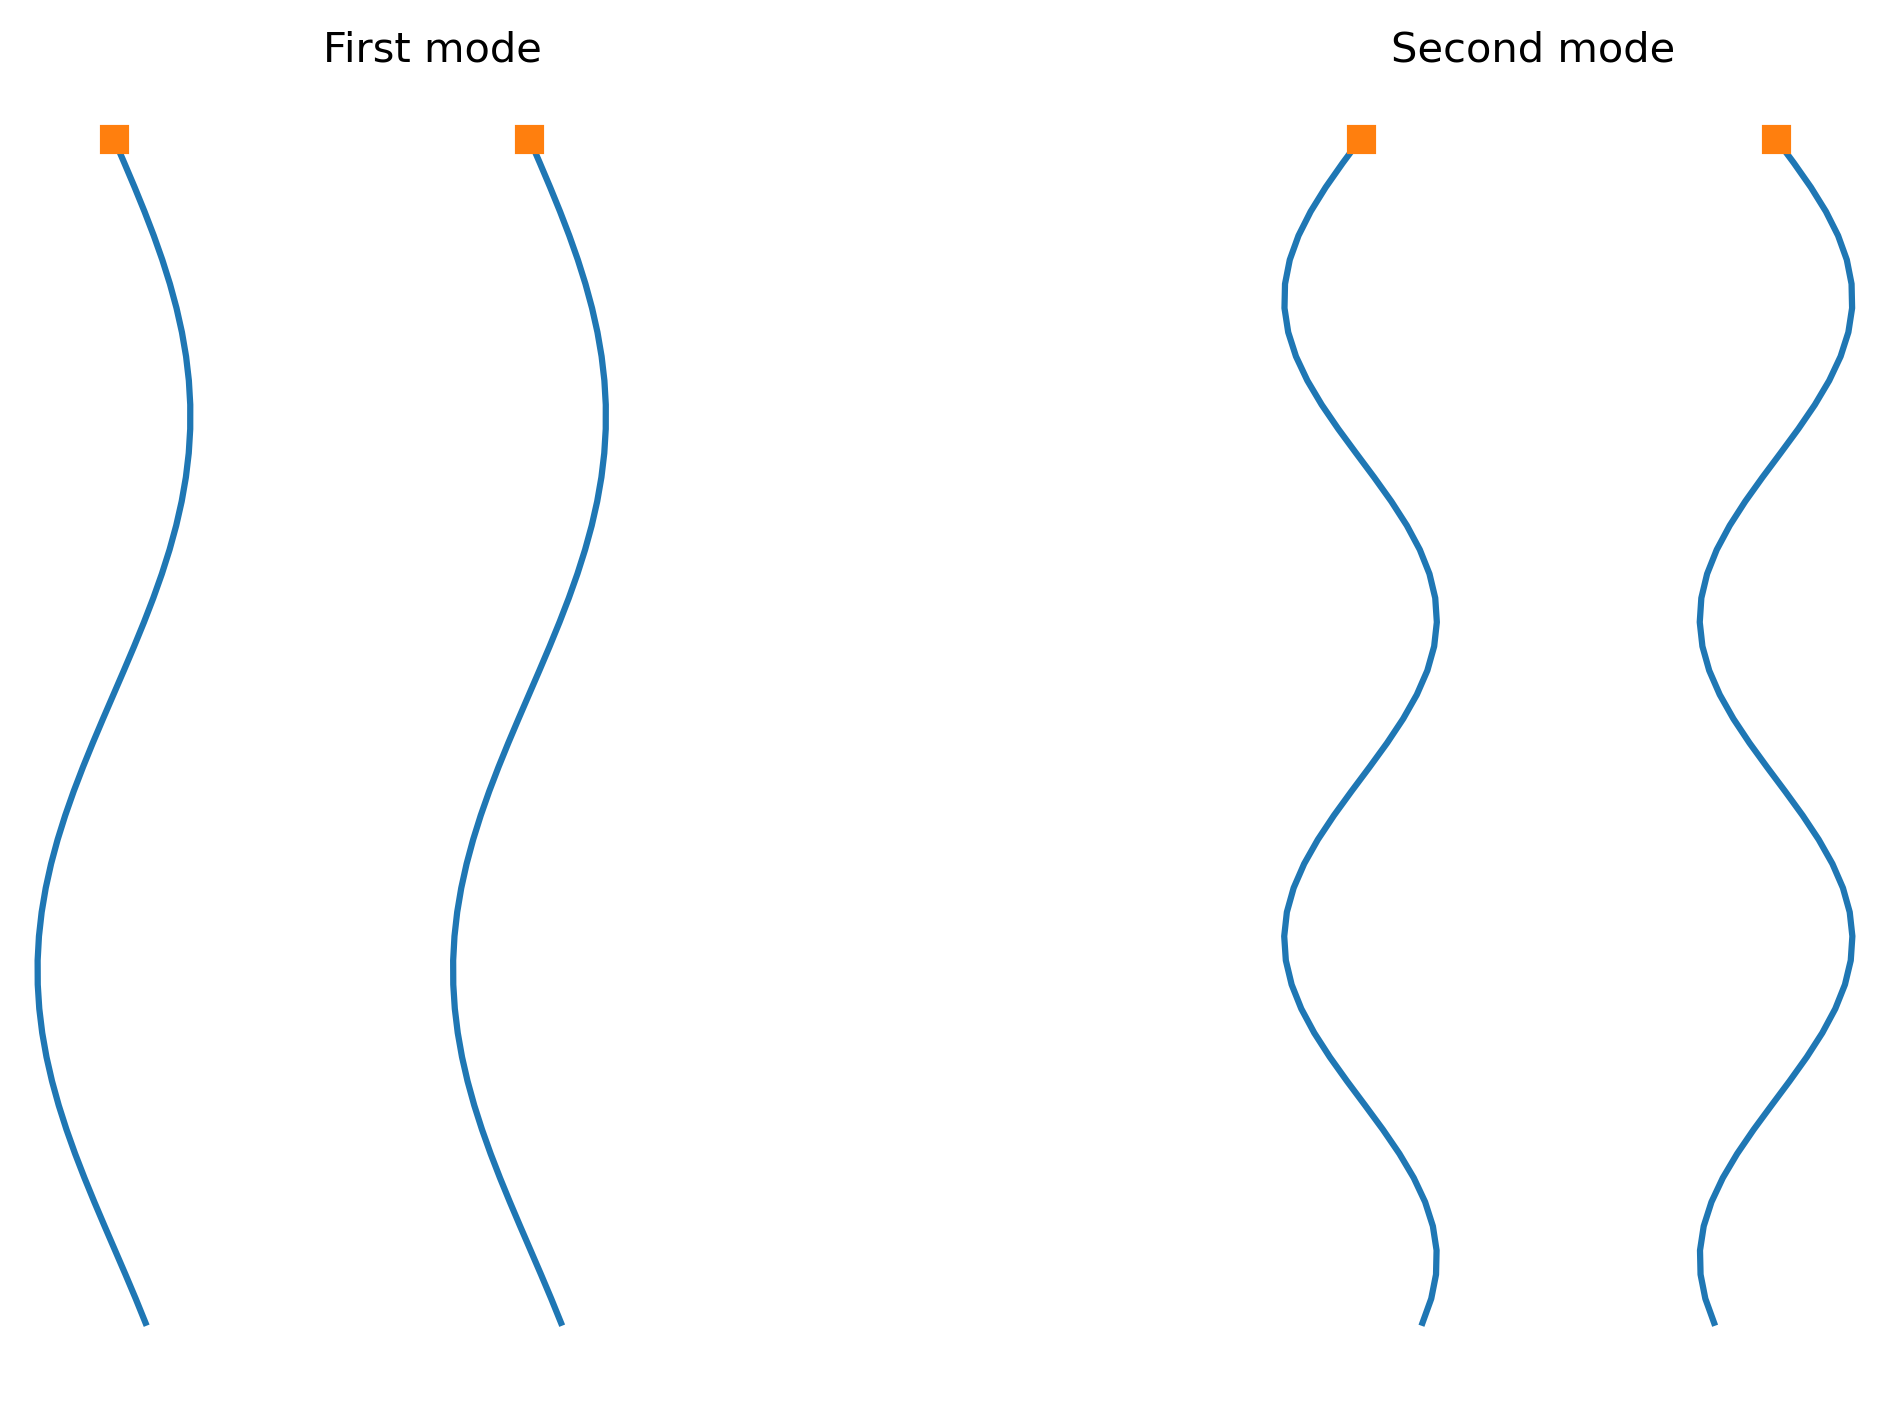

In [74]:
fig, axes = plt.subplots(1, 5)

time = np.linspace(0, 3)
axes[0].plot(np.sin(omega[0]*time), time)
axes[0].plot(0, 0, 's')
axes[0].invert_yaxis()
axes[0].axis('off')

axes[1].plot(np.sin(omega[0]*time), time)
axes[1].plot(0, 0, 's')
axes[1].invert_yaxis()
axes[1].axis('off')
axes[1].text(-2.7,-0.2, 'First mode')

axes[2].axis('off')

axes[3].plot(-np.sin(omega[1]*time), time)
axes[3].plot(0, 0, 's')
axes[3].invert_yaxis()
axes[3].axis('off')
axes[3].text(0.4, -0.2, 'Second mode')

axes[4].plot(np.sin(omega[1]*time), time)
axes[4].plot(0, 0, 's')
axes[4].invert_yaxis()
axes[4].axis('off')

plt.tight_layout()
plt.show()

We can confirm that the system would actually behave in this way by setting up the system of ODEs and integrating based on initial conditions matching the amplitudes of the two modes.

For example, let's use $x_1 (t=0) = x_2(t=0) = 1$ for the first mode, and $x_1(t=0) = 1$ and $x_2(t=0) = -1$ for the second mode. We'll use zero initial velocity for both cases. 

Then, we can solve by converting the system of two 2nd-order ODEs into a system of four 1st-order ODEs:

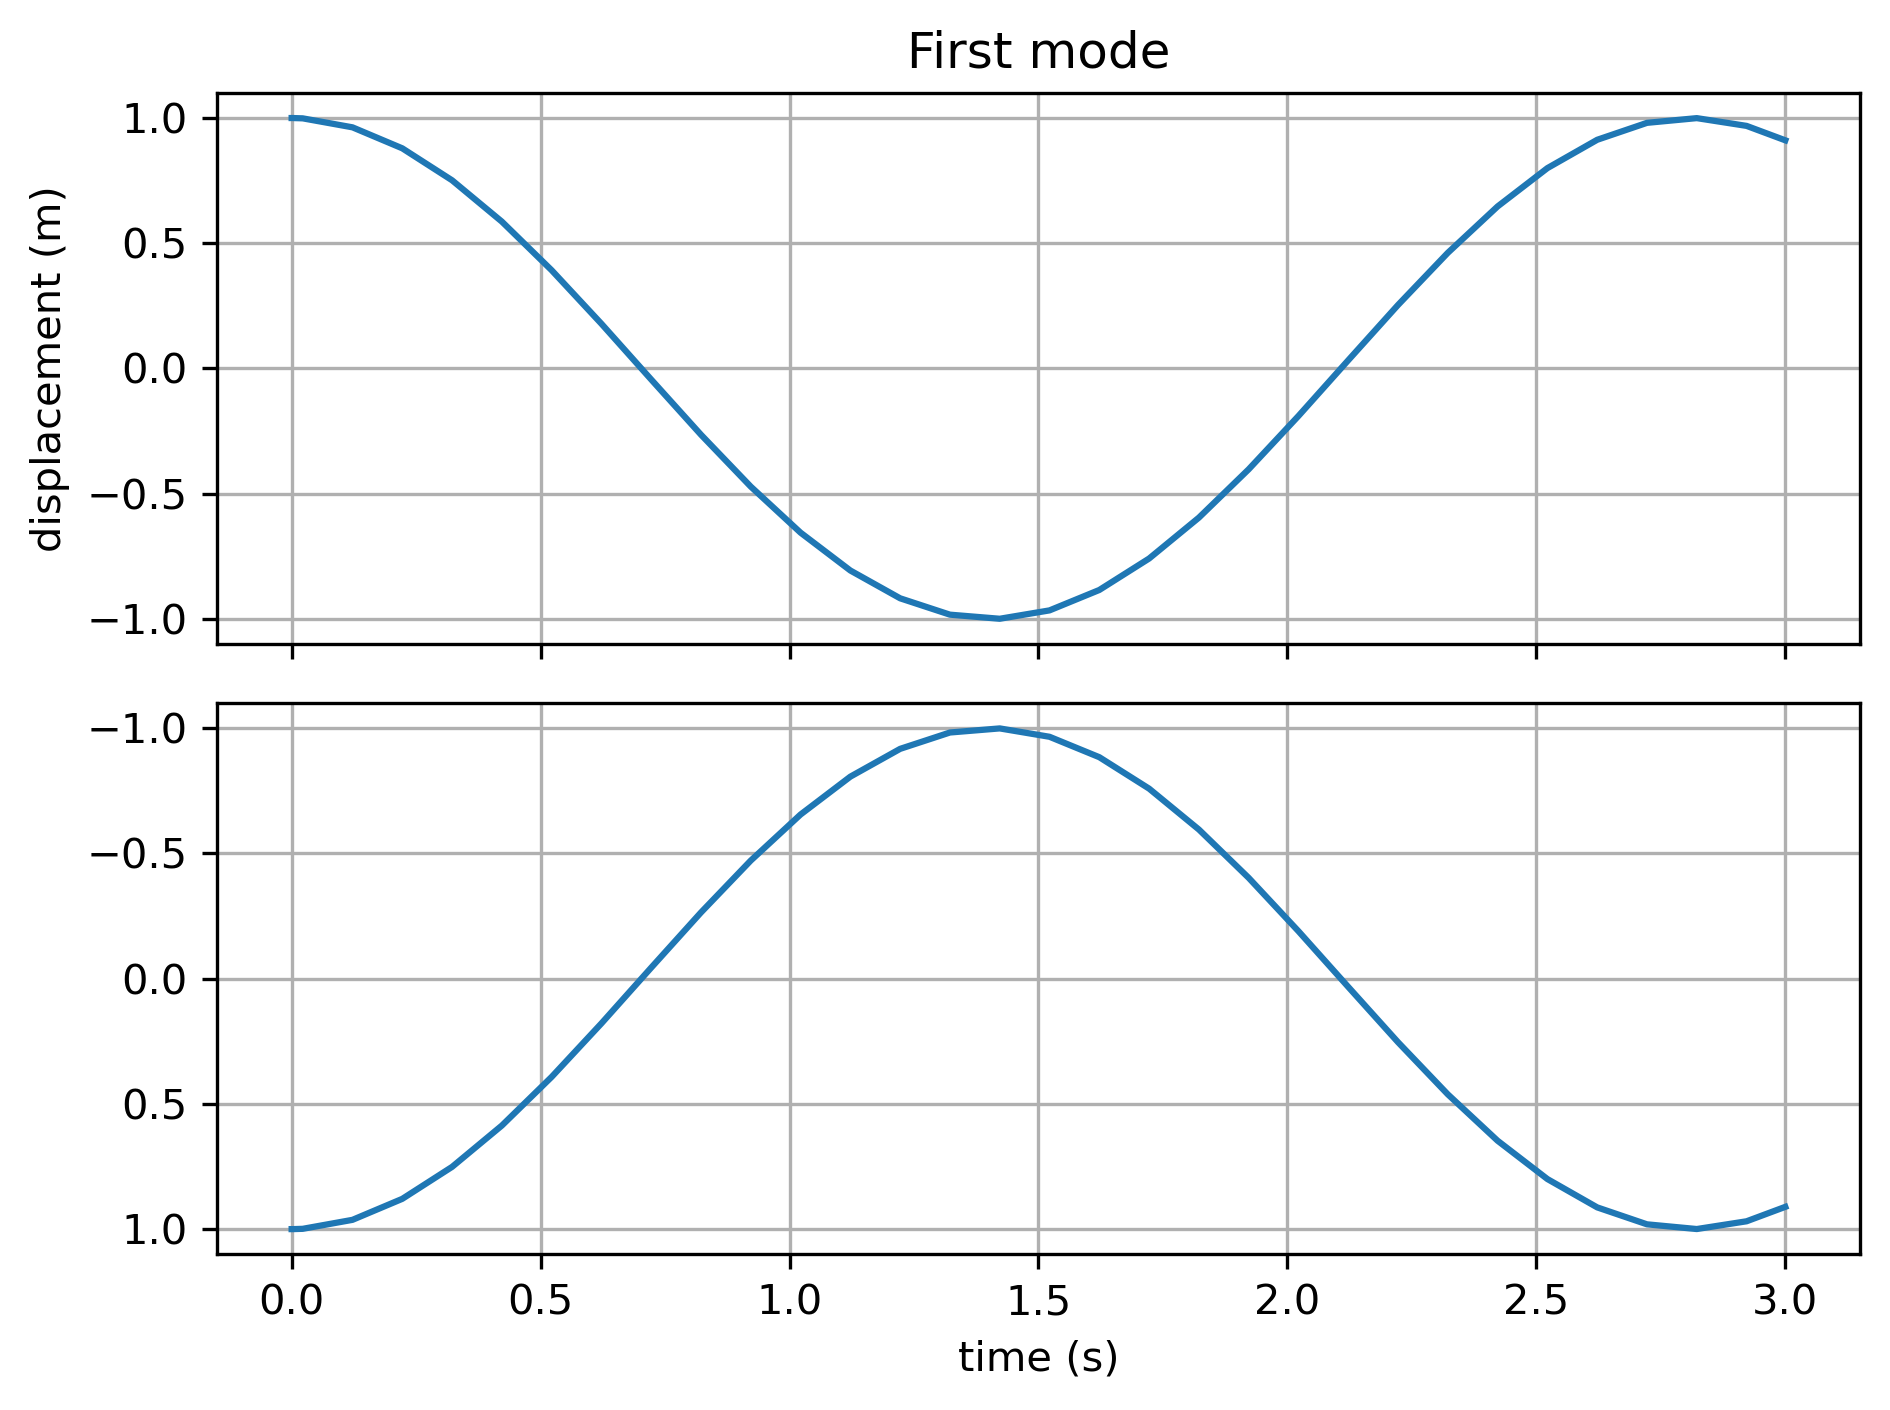

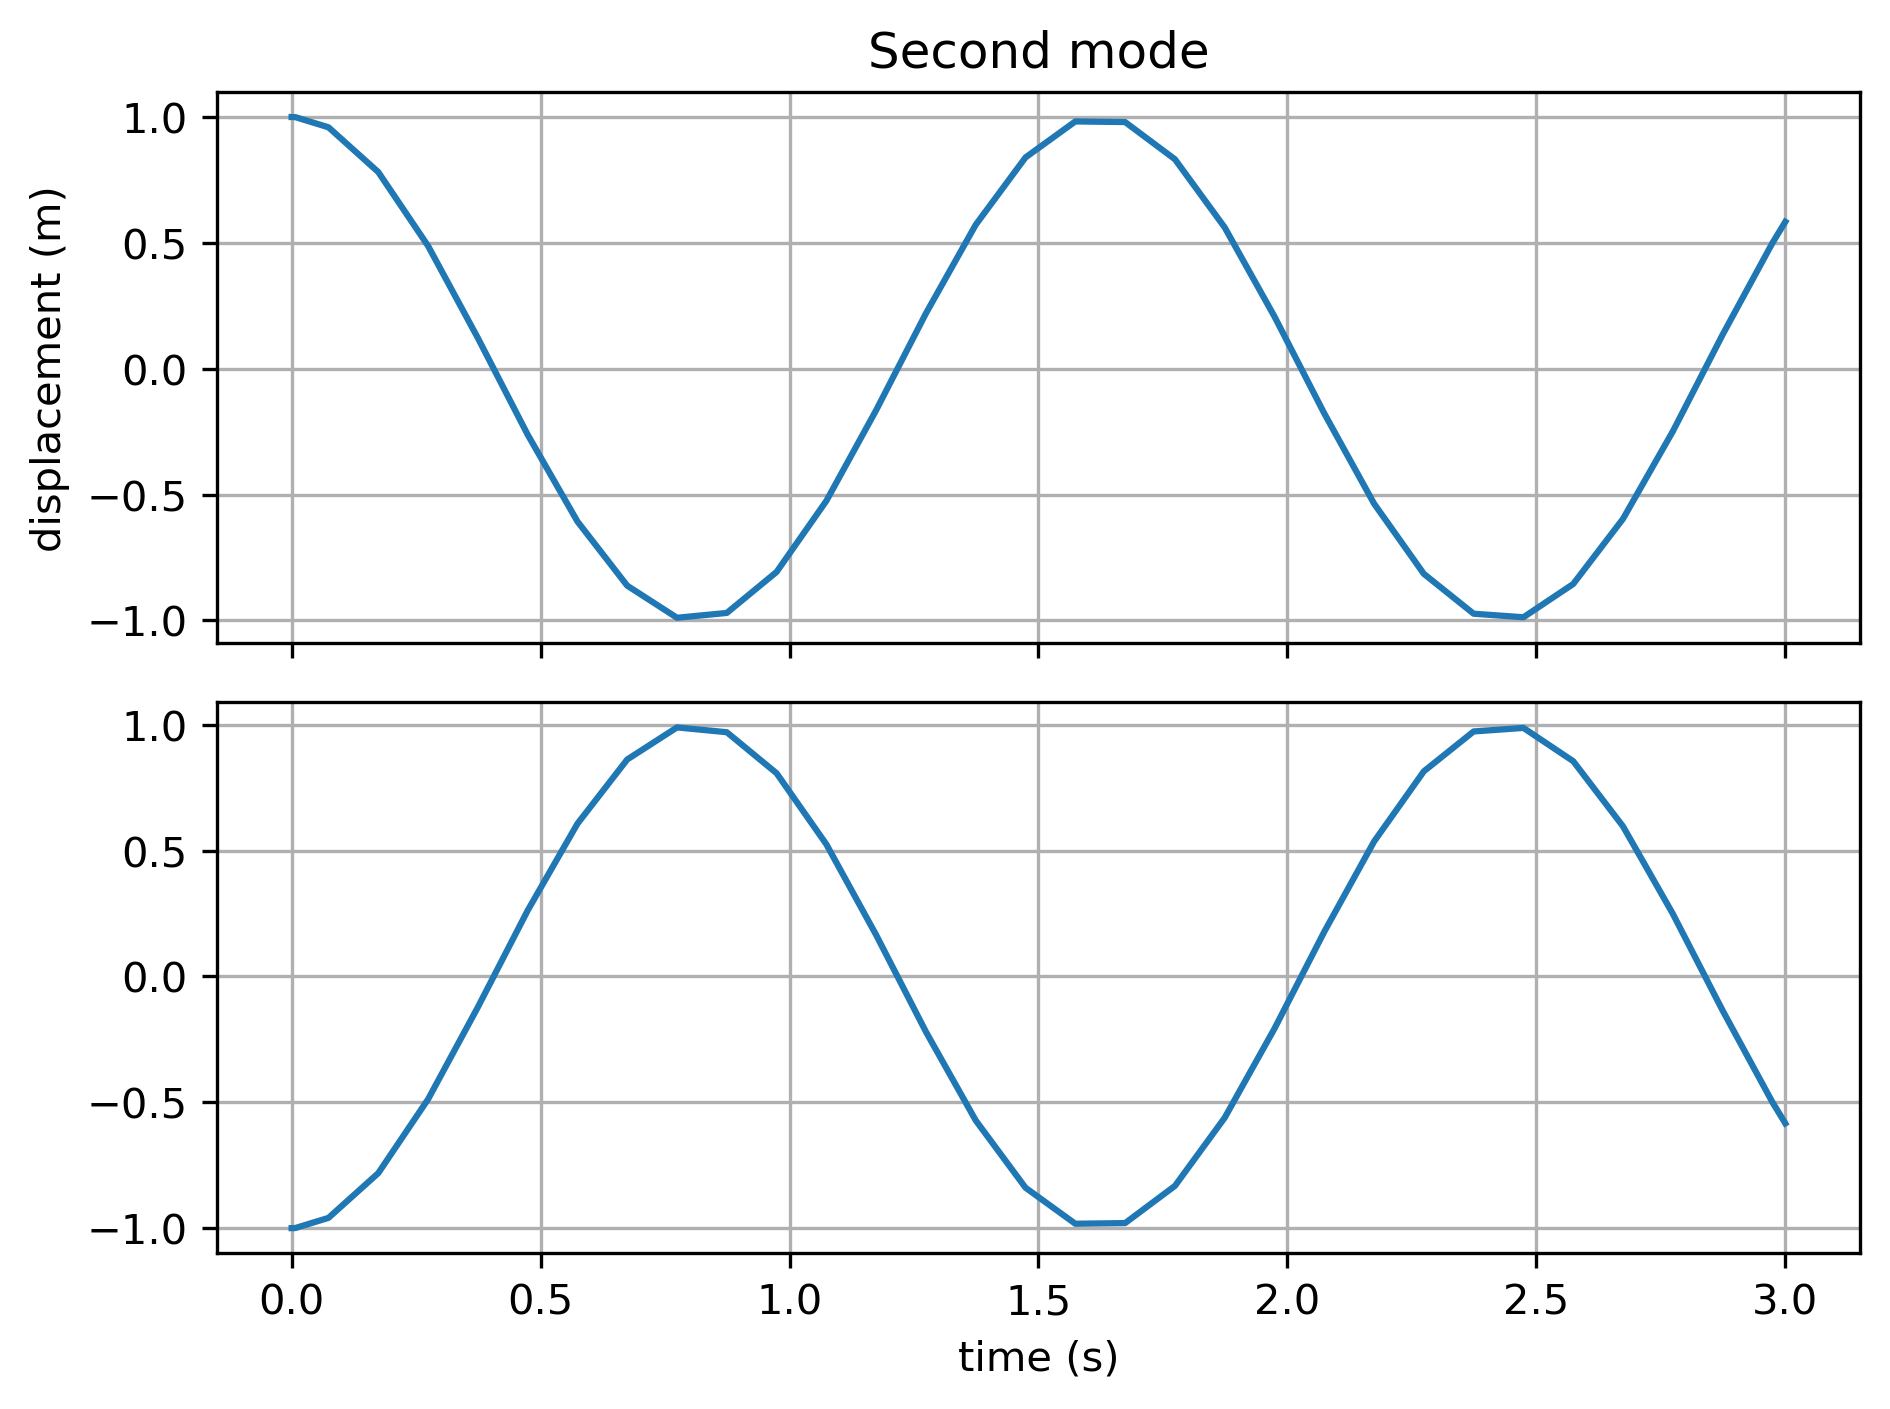

In [84]:
def masses(t, x):
    '''calculates derivatives associated with the system'''
    m1 = 40
    m2 = 40
    k = 200
    
    return [
        x[1],
        (k/m1) * (-2*x[0] + x[2]),
        x[3],
        (k/m2) * (x[0] - 2*x[2]),
        ]

fig, axes = plt.subplots(2, 1, sharex=True)

# integration for the system in the first mode
sol1 = solve_ivp(masses, [0, 3], [1, 0, 1, 0], max_step=0.1)

axes[0].plot(sol1.t, sol1.y[0,:])
axes[0].grid(True)
axes[0].set_ylabel('displacement (m)')
axes[0].set_title('First mode')
axes[1].plot(sol1.t, sol1.y[2,:])
axes[1].invert_yaxis()
axes[1].grid(True)
axes[1].set_xlabel('time (s)')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 1, sharex=True)

# integration for the system in second mode
sol2 = solve_ivp(masses, [0, 3], [1, 0, -1, 0], max_step=0.1)

axes[0].plot(sol2.t, sol2.y[0,:])
axes[0].grid(True)
axes[0].set_ylabel('displacement (m)')
axes[0].set_title('Second mode')
axes[1].plot(sol2.t, sol2.y[2,:])
axes[1].grid(True)
axes[1].set_xlabel('time (s)')

plt.tight_layout()
plt.show()

This shows that we get either of the pure modes of motion with the appropriate initial conditions.

What about if the initial conditions *don't* match either set of amplitude patterns?

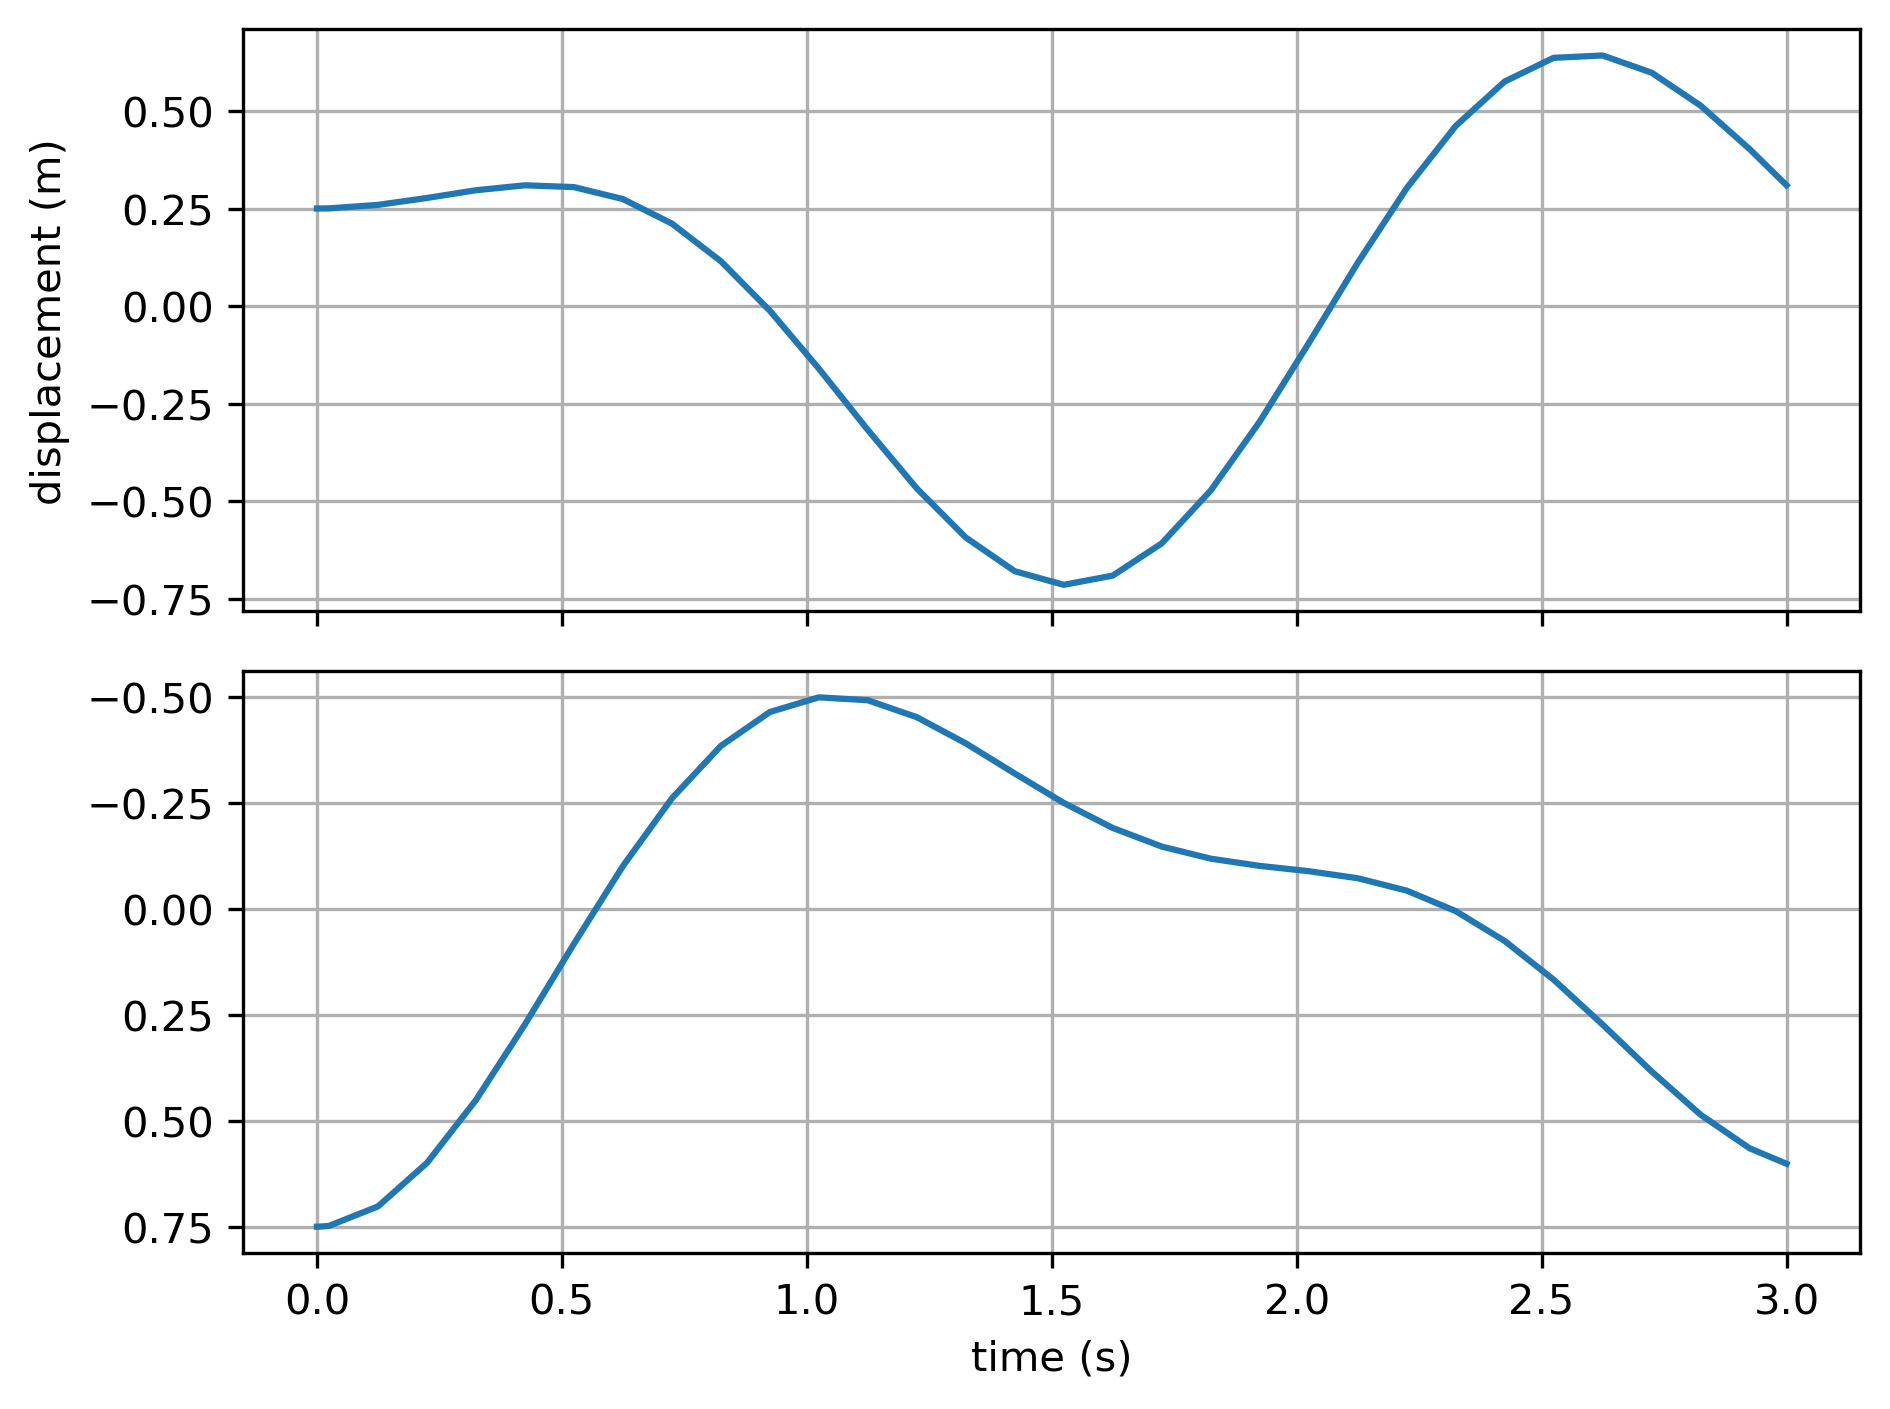

In [86]:
fig, axes = plt.subplots(2, 1, sharex=True)

# integration for the system in the first mode
sol1 = solve_ivp(masses, [0, 3], [0.25, 0, 0.75, 0], max_step=0.1)

axes[0].plot(sol1.t, sol1.y[0,:])
axes[0].grid(True)
axes[0].set_ylabel('displacement (m)')
axes[1].plot(sol1.t, sol1.y[2,:])
axes[1].invert_yaxis()
axes[1].grid(True)
axes[1].set_xlabel('time (s)')

plt.tight_layout()
plt.show()

In this case, the resulting motion will be a complicated superposition of the two modes.